### header 탐색 후 원하는 컬럼 선택 할것 이용과 관련 있는것으로

In [85]:
from pyspark.sql import SparkSession
from typing import Generator, List
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import os 

spark = SparkSession.builder.master("local").appName("year-taxi").getOrCreate()

# directory: Generator[str, None, None] = (f"{os.getcwd()}/data/{i}" for i in range(1, len(os.listdir(f"{os.getcwd()}/data"))))
# filename: List[str] = [f"{p}/{data}" for p in directory for data in os.listdir(p)]

In [86]:
directory: str = f"{os.getcwd()}/data/2020"
trip1: str = "fhvhv_tripdata_2020-01.parquet"

trip_data1 = spark.read.parquet(f"file:///{directory}/{trip1}")
trip_data1.createOrReplaceTempView('month2021_data')

In [87]:
qs = """
SELECT
    pickup, count(*) as trip
FROM
    (SELECT split(pickup_datetime, " ")[0] as pickup FROM month2021_data)
GROUP BY
    pickup
ORDER BY 
    pickup
"""
cal_date = spark.sql(qs).createOrReplaceTempView("week_trip")
df_pan = spark.sql(qs).toPandas()

In [88]:
qs = """
SELECT
    DATE_FORMAT(pickup, "EEEE") as week, trip
FROM 
    week_trip
"""
data = spark.sql(qs).toPandas()

In [89]:
group_data = data.groupby("week").trip.median().to_frame().reset_index()
group_data["sort_dow"] = data["week"].replace({
    "Sunday": 0,
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,  
})

Text(0.5, 1.0, 'NYC Texi 2020-01-01 ~ 2020-02-01')

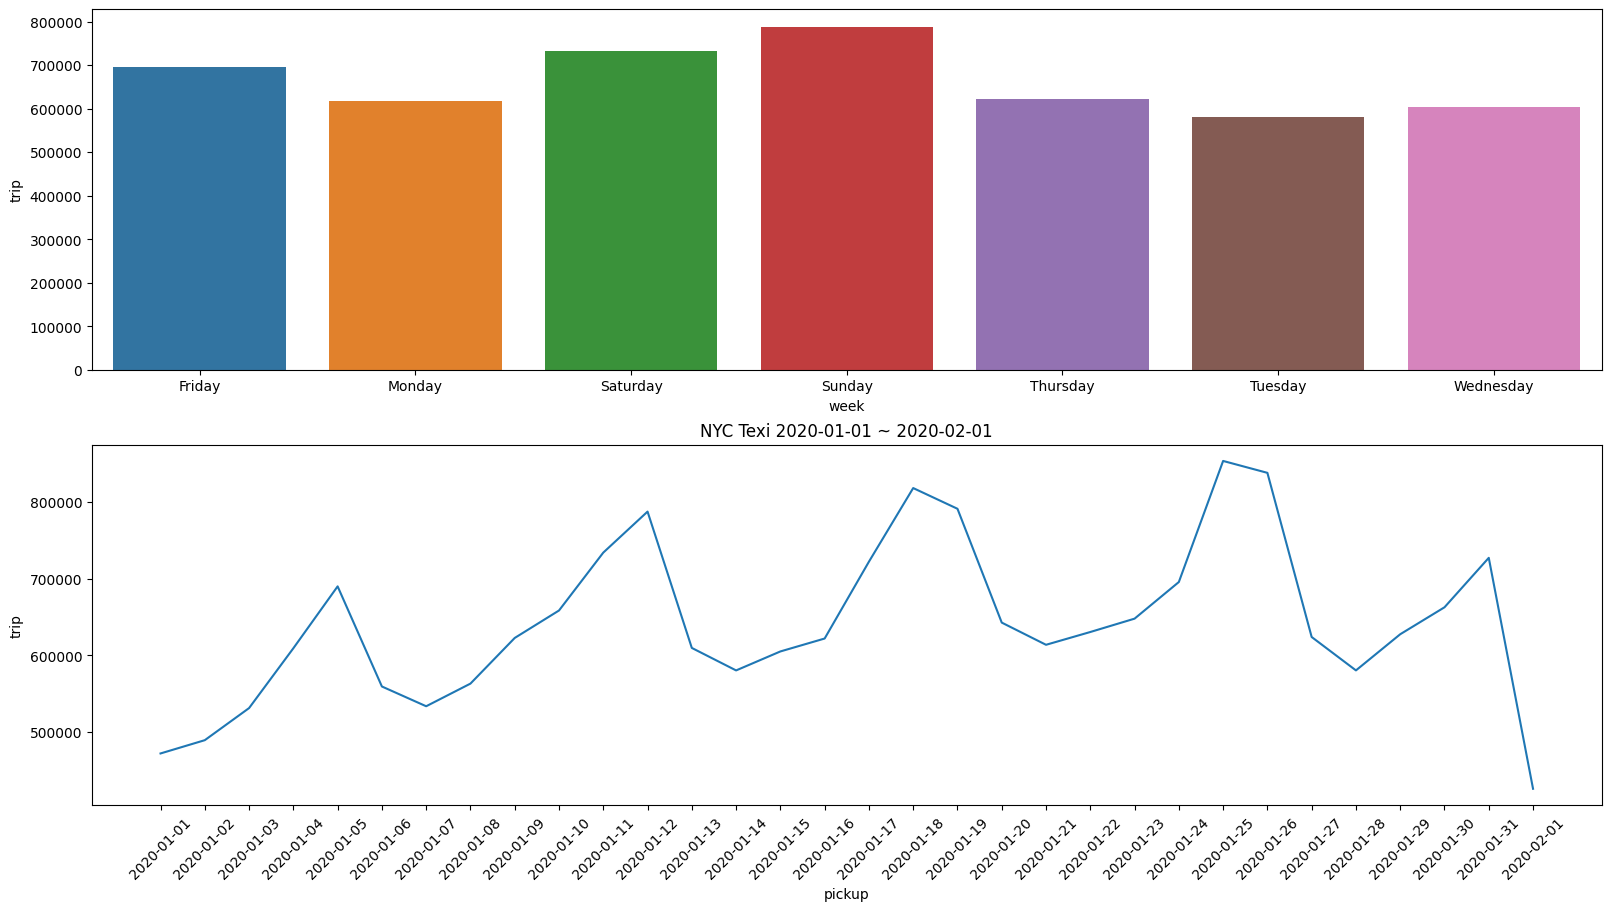

In [98]:
fig, ax = plt.subplots(2, 1, figsize=(16, 9), constrained_layout=True)
sns.barplot(x="week", y="trip", data=group_data, ax=ax[0])
sns.lineplot(x="pickup", y="trip", data=df_pan)
plt.xticks(rotation=45)
plt.title("NYC Texi 2020-01-01 ~ 2020-02-01")